# 📊 BigMart Sales Analysis & Revenue Insights

#### Dataset Description

The BigMart Sales dataset contains 8,523 records with 12 features, 
describing sales data of various products sold across different BigMart outlets.

It includes product-level attributes (such as weight, fat content, type, visibility, and price) 
and outlet-level attributes (such as store size, location type, outlet type, and establishment year).

The target variable is Item_Outlet_Sales, which represents the total sales of a product in a particular outlet.

#### Problem Statement

Objective:
The objective of this analysis is to identify key factors influencing sales performance across product categories and outlet characteristics to support data-driven revenue optimization strategies.

Business Use Case:
By predicting product sales, BigMart can:
- Optimize inventory planning
- Improve store-level stocking decisions
- Identify high-performing products and outlets
- Increase overall revenue through data-driven strategies

#### Features Description: 
##### Numerical features: 
- Item_Weight : Weight of the product or item. 
- Item_Visibility : The % of the total display area of all products in a store allocated to the particular product.
- Item_MRP : Maximum Retail Price (list price) of the product
- Outlet_Establishment_Year : The year in which the store was established.
- Item_Outlet_Sales : sales of the product in a particular store. This is the target variable to be predicted.
##### Categorical features: 
- Item_Identifier : Unique product ID (we would want to drop this column later)
- Item_Fat_Content : Whether the product is low, fat or not
- Item_Type : The category to which the product belongs.
- Outlet_Identifier : Unique store
- ID Outlet_Size : The size of the store in terms of ground area covered.
- Outlet_Location_Type : The type of city in which the store is located.
- Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("BigMart_sales(in).csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.shape

(8523, 12)

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- asType() is not needed as all the columns are off proper type 

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.duplicated().sum()

0

- We have some null values in Item_Weight (1463) and Outlet_Size (2410) columns.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


- By comparing the average value and the median value, looks like the Item_Outlet_Sales could be a bit skwed,but for other columns we see the central measures are close

In [11]:
## Create dist plot locate mean and median calculate the skewness and comment on the distribution
numerical_features=df.select_dtypes(include="float").columns.tolist()

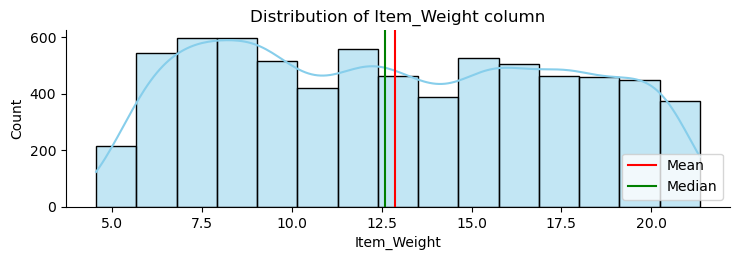

The skewness value is: 0.08



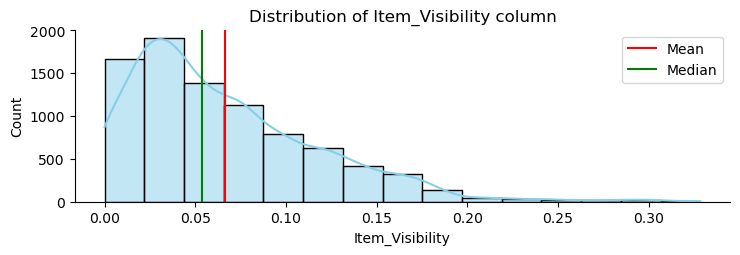

The skewness value is: 1.17



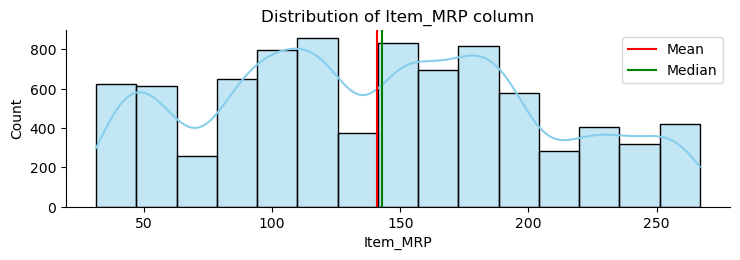

The skewness value is: 0.13



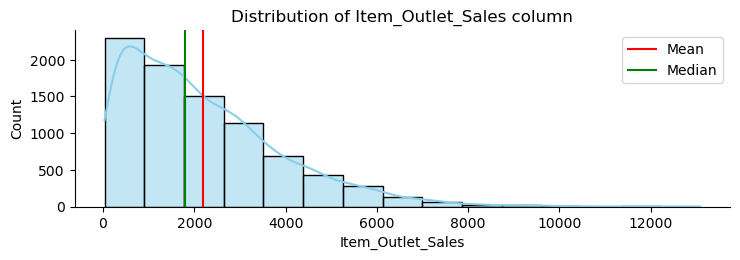

The skewness value is: 1.18



In [12]:
for i in numerical_features:
    sns.displot(df,x=i,bins=15,height=2.5,aspect=3,color="skyblue",kde=i)
    plt.title(f"Distribution of {i} column")
    plt.axvline(df[i].mean(),label="Mean",c="r")
    plt.axvline(df[i].median(),label="Median",c="g")
    plt.legend()
    plt.show()
    print(f"The skewness value is: {round(df[i].skew(),2)}")
    print()

In [13]:
## other features
other_features=df.select_dtypes(include=["int","object"]).columns.tolist()

In [14]:
other_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

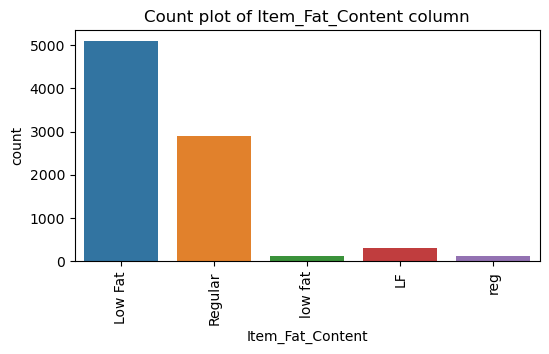

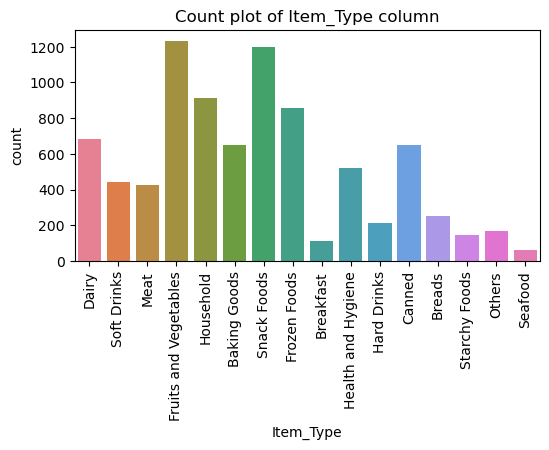

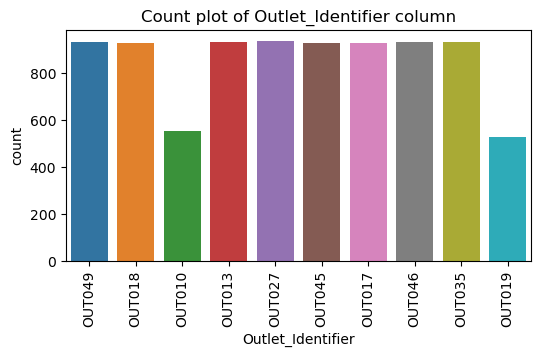

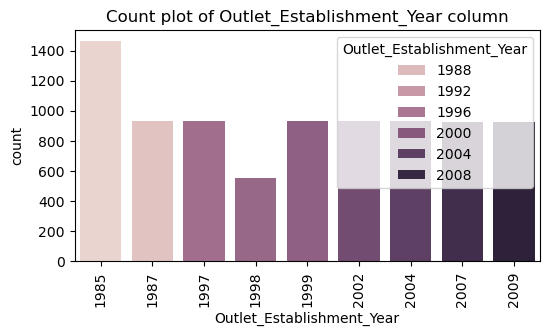

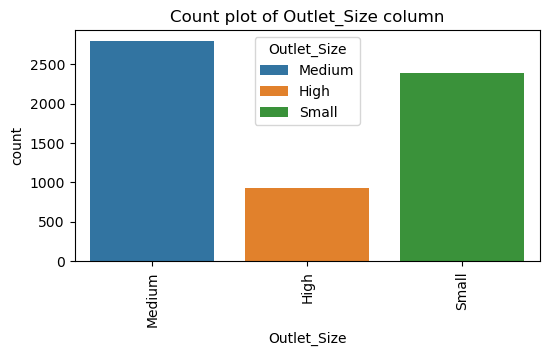

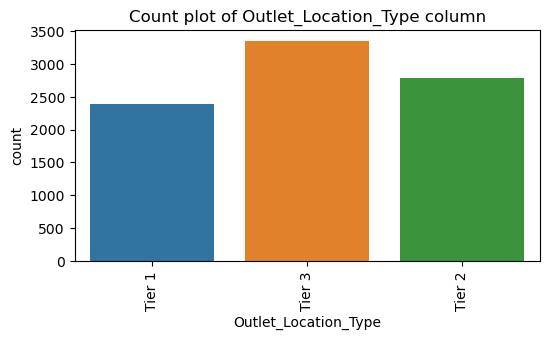

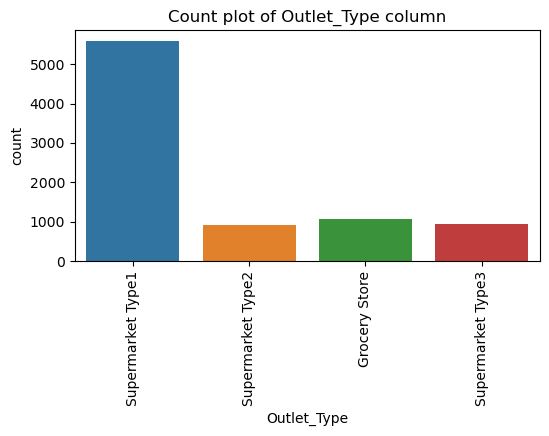

In [15]:
## create count plot for each other_features except Item_Identifier
for i in other_features:
    if i!="Item_Identifier":
        plt.figure(figsize=(6,3))
        sns.countplot(df,x=i,hue=i)
        plt.title(f"Count plot of {i} column")
        plt.xticks(rotation=90)
        plt.show()

- Most of the items are low fat products and the labels have to fixed
- Many outlets were established in the year 1985, post which the count has decrease for other years and remained consistanted,except 1998 where the count was low
- Medium and small outlate size dominates the data,while High outlates are few
- Supermarkets are more in count as compared to grocery dtores
- Tire-3 are more count as compared to Tire-1 and Tire-2
- Fruits,vegetables and snack foods are seems to be most frequently purchased items 

In [16]:
## Fix the labels in the fat content: map method
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [17]:
df.Item_Fat_Content=df.Item_Fat_Content.map({"Low Fat":"Low Fat","LF":"Low Fat","low fat":"Low Fat",
                         "reg":"Regular","Regular":"Regular"})

In [18]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

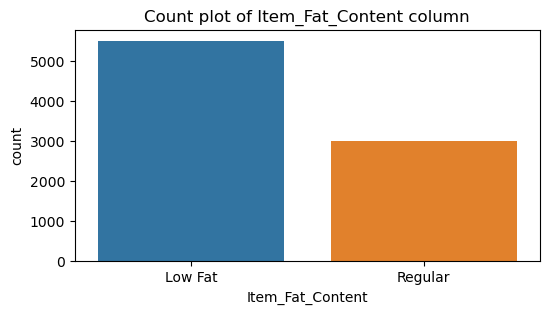

In [19]:
plt.figure(figsize=(6,3))
sns.countplot(df,x="Item_Fat_Content",hue="Item_Fat_Content")        
plt.title("Count plot of Item_Fat_Content column")
plt.show()

In [20]:
## Handle null values
df.isnull().sum()/len(df)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [21]:
df.fillna({"Item_Weight": df["Item_Weight"].mean(),"Outlet_Size":df["Outlet_Size"].mode()[0]},inplace=True)

In [22]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

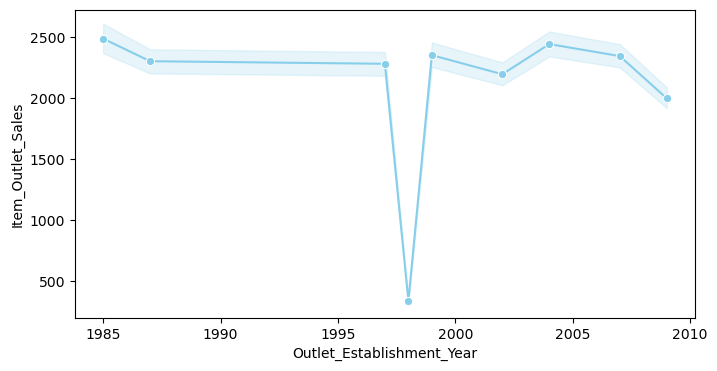

In [23]:
## Which factor influence the target_variable : Item_Outlate_sales
plt.figure(figsize=(8,4))
sns.lineplot(df,x="Outlet_Establishment_Year",y="Item_Outlet_Sales",color="skyblue",marker="o")
plt.show()

In [24]:
df.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean()

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

In [25]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [26]:
# create scatter plot betweeen the numerical features and the outlat sales

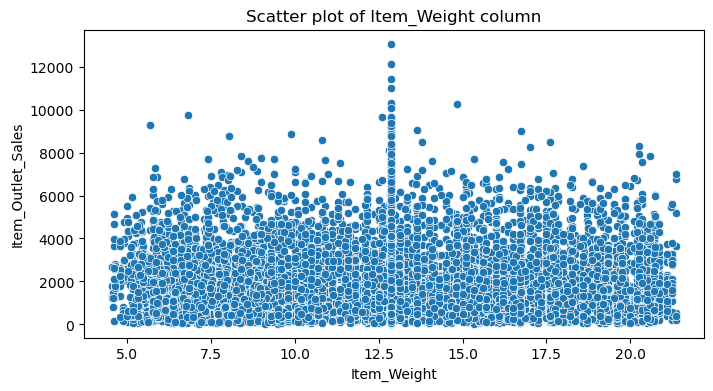

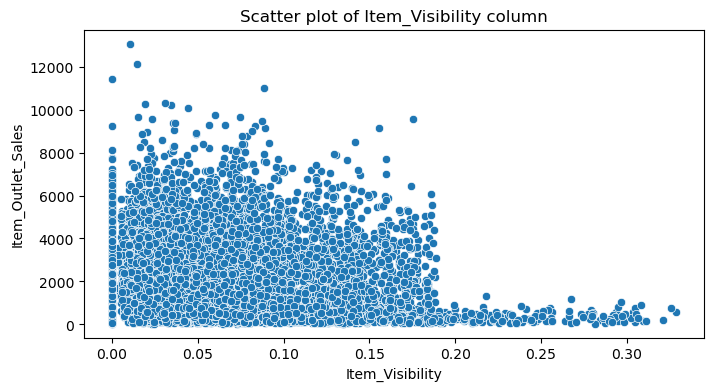

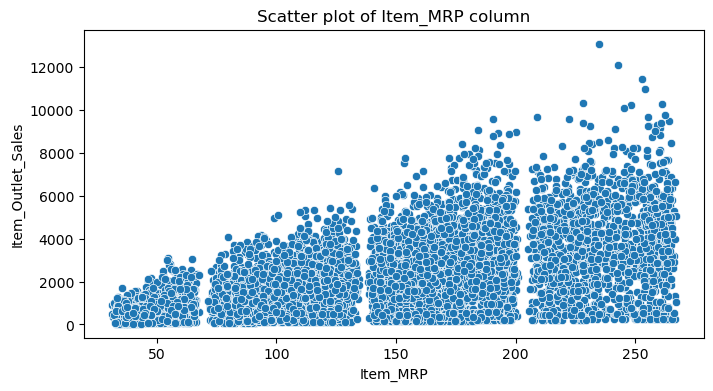

In [27]:
for i in numerical_features:
    if i!="Item_Outlet_Sales":
        plt.figure(figsize=(8,4))
        sns.scatterplot(df,x=i,y="Item_Outlet_Sales")
        plt.title(f"Scatter plot of {i} column")
        plt.show()


- There seems to be no patterns in the scatter plot between Item_Weight and Item_Outlat_Sales
- On second scatter plot which is between Item_visibility and Item_Outlat_Sales the most of the sales is under 8000 with the Item_visibility under 0.20
- On the scatter plot between Item_MRP and Item_Outlat_Sales we can clearly see a trend that as the item MRP increase the outlate sale is alsp increase.

In [28]:
## Fetch which supermarket has highest average sales
df.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False)

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

Supermarket Type3 have highest average Item_Outlet_Sales

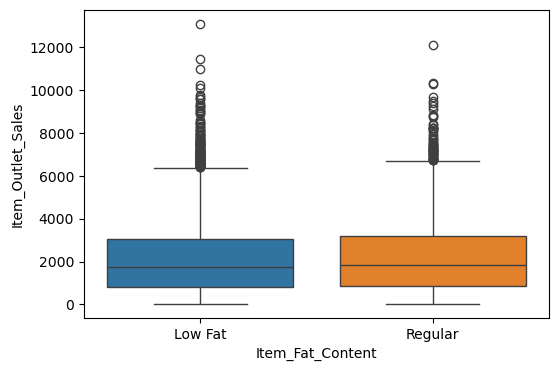

In [29]:
# Create a box plot to identifyif fat content in items has any relationship with Item_Outlet_Sales
plt.figure(figsize=(6,4))
sns.boxplot(df,x="Item_Fat_Content",y="Item_Outlet_Sales",hue="Item_Fat_Content")
plt.show()

Fat content in the product is not really impacting the outlet sales

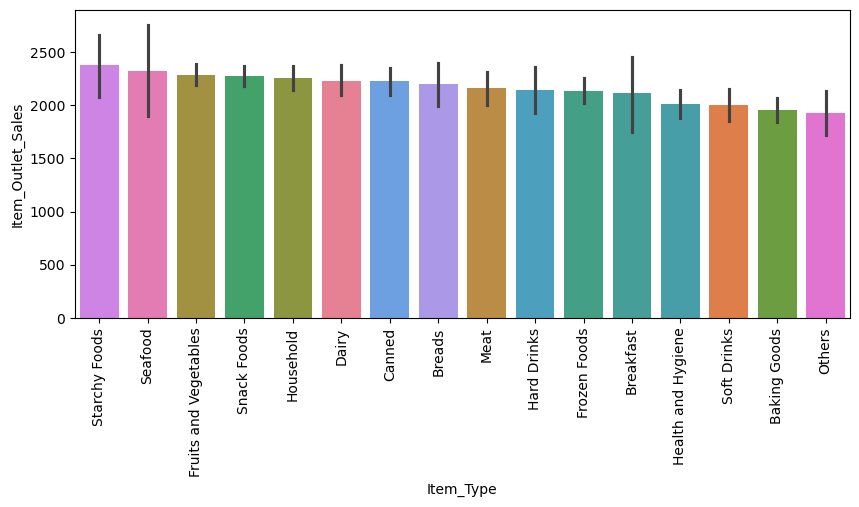

In [30]:
# Now move on to item types and how it impact the outlet sales
plt.figure(figsize=(10,4))
sns.barplot(df,x="Item_Type",y="Item_Outlet_Sales",hue="Item_Type",order=df.groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

- Top 3 categories with highest average sales- Starchy food, seafood and fruits and vegetables
- Top 3 categories with lowest average sales- Soft drinks, Baking goods na Others

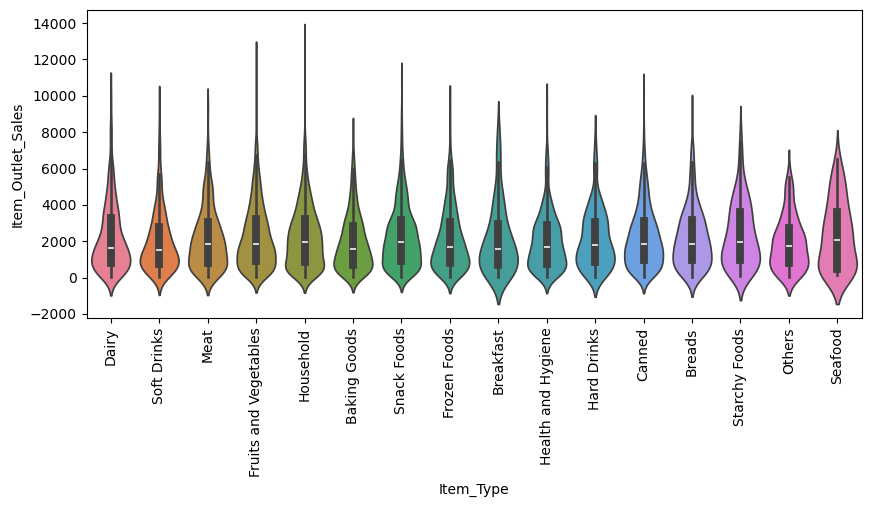

In [31]:
## violin plot
plt.figure(figsize=(10,4))
sns.violinplot(df,x="Item_Type",y="Item_Outlet_Sales",hue="Item_Type")
plt.xticks(rotation=90)
plt.show()

- There seems to be different in the Distributions of outlet sales for the different item types

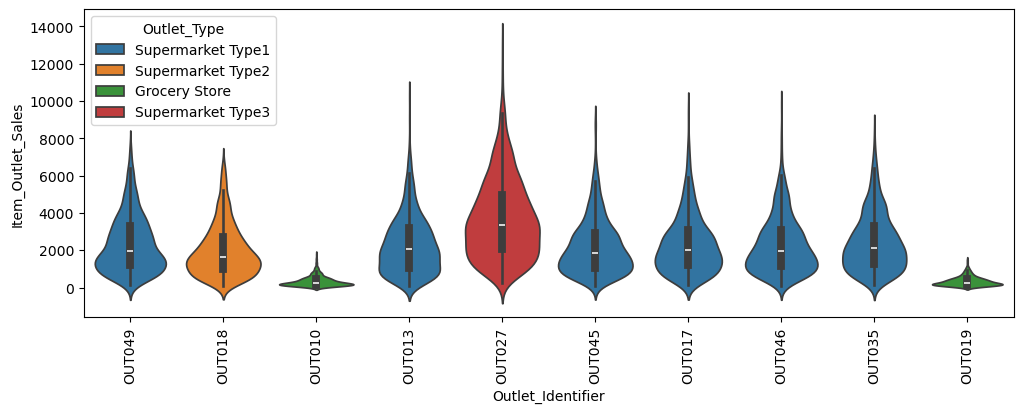

In [32]:
## violin plot Outlet_Identifier and Item_Outlet_Sales
plt.figure(figsize=(12,4))
sns.violinplot(df,x="Outlet_Identifier",y="Item_Outlet_Sales",hue="Outlet_Type")
plt.xticks(rotation=90)
plt.show()

- Sales from Grocery store outlets is lower, ranging between 30 till 2000
- Most of the outlets are Typr1 supermarkets with sales ranging between 70 till 10000
- The range od sales was highest(240-14000) for Supermarket Type3

In [33]:
df.groupby("Outlet_Type")["Item_Outlet_Sales"].min()

Outlet_Type
Grocery Store         33.2900
Supermarket Type1     73.2380
Supermarket Type2     69.2432
Supermarket Type3    241.6854
Name: Item_Outlet_Sales, dtype: float64

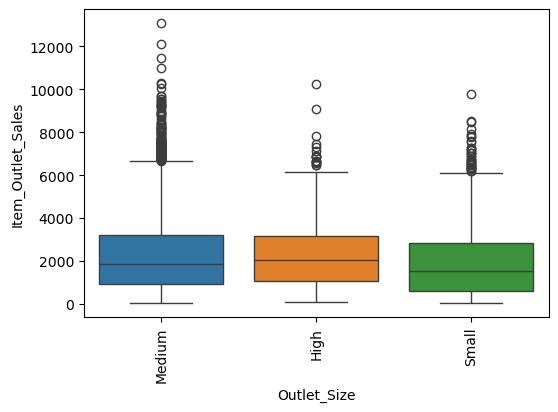

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(df,x="Outlet_Size",y="Item_Outlet_Sales",hue="Outlet_Size")
plt.xticks(rotation=90)
plt.show()

- The sales seems to be dependent on the Outlet_Sizes
- Median sales is higher for large size to small size, although the medium sales slightly high

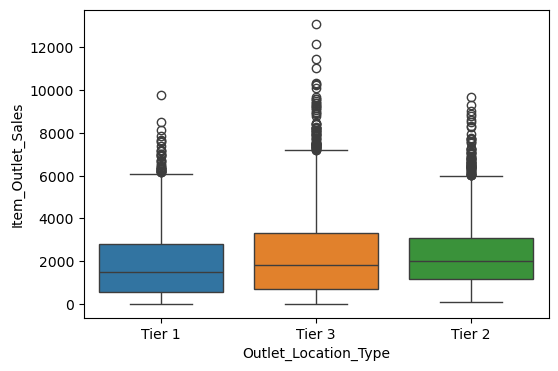

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(df,x="Outlet_Location_Type",y="Item_Outlet_Sales",hue="Outlet_Location_Type")
plt.show()

Tier-1 has slightly lower median sales as compared to tier 2 and tier 3

In [36]:
# Fetch the record where the visibility score iz zero
df[df["Item_Visibility"]==0].shape

(526, 12)

In [37]:
# Fill the values in item visibility where the score is 0 with it's respective mean
avg_visibility=df["Item_Visibility"].mean()

In [38]:
df_copy=df.copy()

In [39]:
df_copy["Item_Visibility"]=df_copy["Item_Visibility"].replace({0:avg_visibility})

In [40]:
df_copy["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.066132
4       0.066132
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

### Feature Engineering: 
#### What is Feature Engineering?
Feature Engineering is the process of selecting, creating or modifying features like input variables or data to help machine learning models learn patterns more effectively. It involves transforming raw data into meaningful inputs that improve model accuracy and performance.

#### Importance of Feature Engineering
Feature engineering can significantly influence model performance. By refining features, we can:

- Improve accuracy: Choosing the right features helps the model learn better, leading to more accurate predictions.
- Reduce overfitting: Using fewer, more important features helps the model avoid memorizing the data and perform better on new data.
- Boost interpretability: Well-chosen features make it easier to understand how the model makes its predictions.
- Enhance efficiency: Focusing on key features speeds up the model’s training and prediction process, saving time and resources.

#### At which stage do we perform this?
During EDA,before model bulding

In [41]:
## Create a new feature called: price_per_unit_weight: Item_MRP/Item_Weight
df_copy["price_per_unit_weight"] = df["Item_MRP"] / df["Item_Weight"]

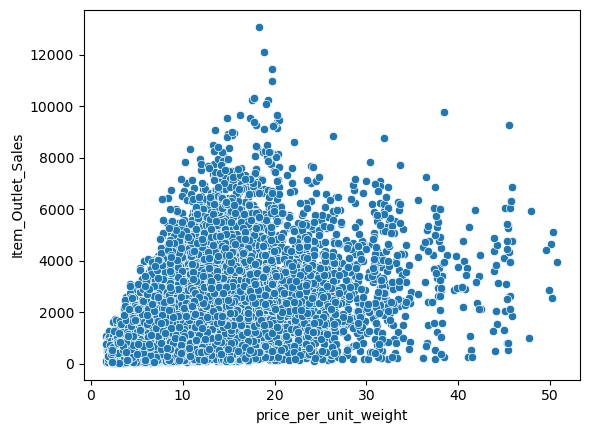

In [42]:
sns.scatterplot(data=df_copy,x="price_per_unit_weight",y="Item_Outlet_Sales")
plt.show()

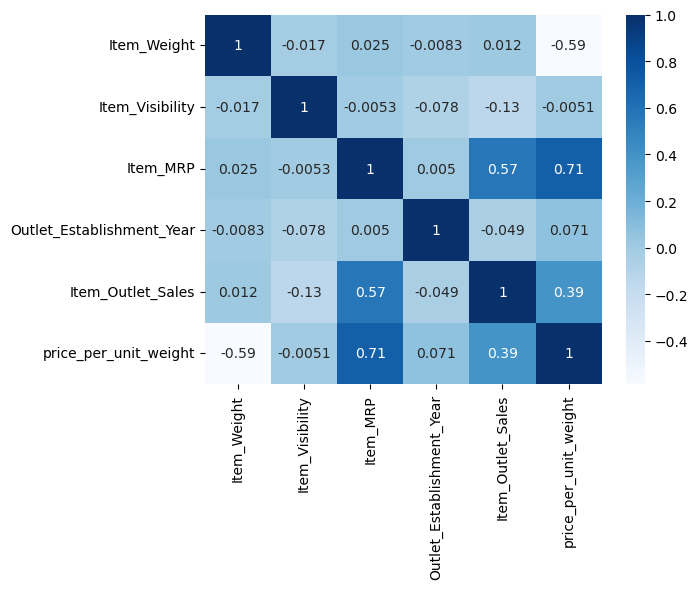

In [43]:
## create t a heatmap to check the correlation between the numerical features
sns.heatmap(df_copy.corr(numeric_only=True),annot=True,cmap="Blues")
plt.show()

- Insights from heatmap:
- We clearly see that we have positive correlation of Item_Outlet_Sales with Item_MRP and price_per_unit_weight 

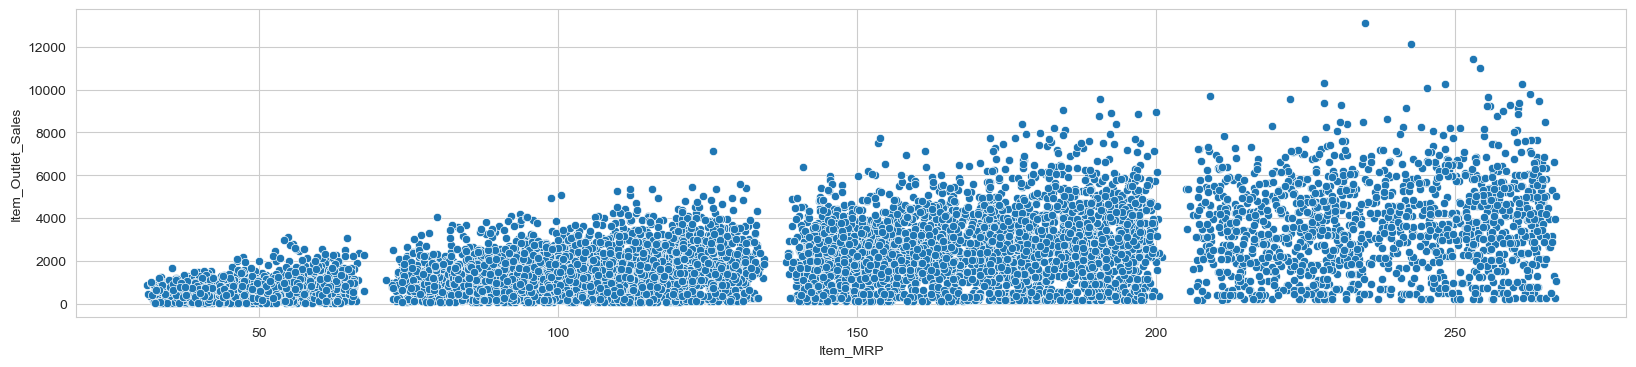

In [44]:
# lets create a new feature MRP_Category
sns.set_style("whitegrid")
plt.figure(figsize=(20,4))
sns.scatterplot(data=df_copy,x="Item_MRP",y="Item_Outlet_Sales")
plt.show()

### Feature Extraction

In [45]:
# 1st cut at 70
# 2nd cut at 140
# 3rd cut au 210 

In [46]:
df_copy["Item_MRP_cat"]=pd.cut(df_copy["Item_MRP"],bins=[0,70,135,205,500],labels=["0-70","71-135","136-205","205 and above"])

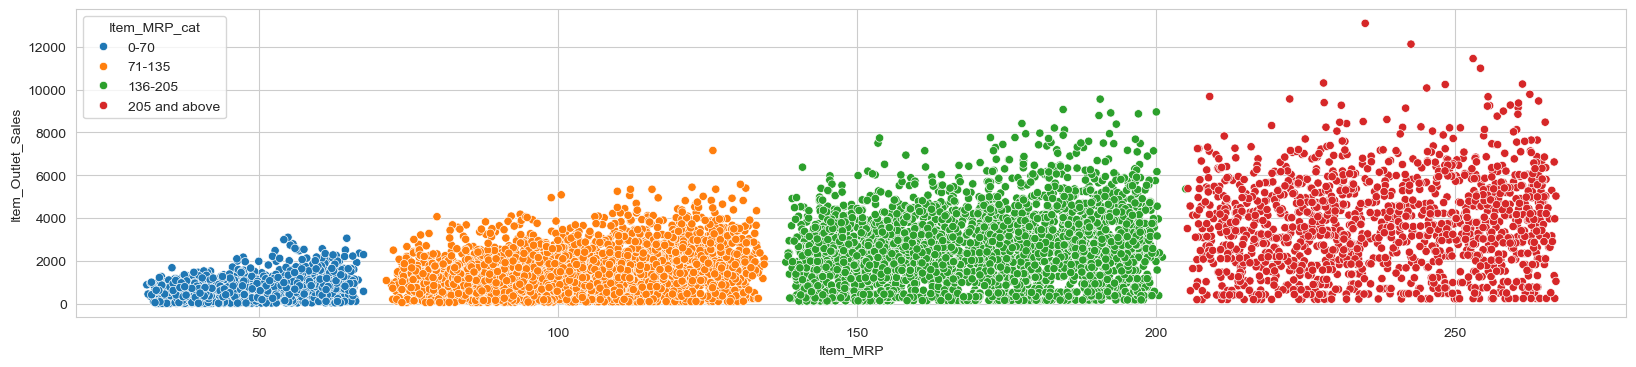

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,4))
sns.scatterplot(data=df_copy,x="Item_MRP",y="Item_Outlet_Sales",hue="Item_MRP_cat")
plt.show()

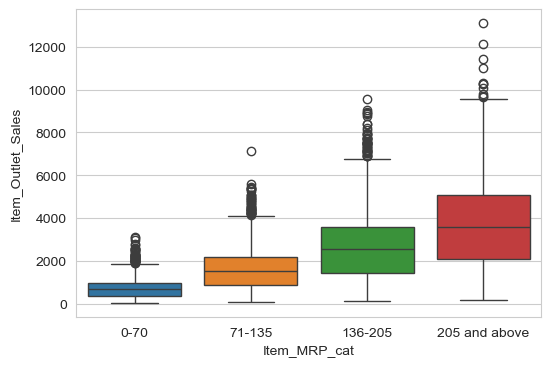

In [48]:
# Distribution of Item_Outlet_Sales for diff Item_MRP_cat
plt.figure(figsize=(6,4))
sns.boxplot(data=df_copy,x="Item_MRP_cat",y="Item_Outlet_Sales",hue="Item_MRP_cat")
plt.show()

- For the MRP category 0-70 the outlet sales are the lowest varying between 0-2000
- As my MRP categories increased the range of sales also has seen wider dispersion.With maximum dispersion of 0-10000 sales noted for the highest MRP category 

In [49]:
df_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price_per_unit_weight,Item_MRP_cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,205 and above
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,0-70
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,136-205
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,136-205
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,0-70


In [50]:
# create a new column called as Item_Identifier_Type: "Non-consumable","Food","Drinks"
df_copy["Item_Identifier_Type"]=df_copy["Item_Identifier"].replace({"^DR[A-Z0-9]*":"Drinks","^FD[A-Z0-9]*":"Food","^NC[A-Z0-9]*":"Non-consumable"},regex=True)

In [51]:
df_copy["Item_Identifier_Type"].value_counts()

Item_Identifier_Type
Food              6125
Non-consumable    1599
Drinks             799
Name: count, dtype: int64

In [52]:
df_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,price_per_unit_weight,Item_MRP_cat,Item_Identifier_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,205 and above,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,0-70,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,136-205,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,136-205,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,0-70,Non-consumable


### Conclusion

The exploratory analysis of the BigMart sales dataset indicates that outlet characteristics, item MRP categories and product categories significantly influence overall sales performance. Supermarket-type outlets generate higher average sales, with medium-sized outlets showing consistent revenue contribution.

Certain product categories drive stronger revenue, highlighting opportunities for strategic inventory focus. Product visibility has limited impact beyond moderate levels, while fat content shows minimal influence on overall sales trends.

Overall, optimizing outlet strategy and prioritizing high-performing product categories can enhance revenue growth and operational efficiency.